# Week 9: Universal TMs and undecidability

In [1]:
from tock import *

## Tuesday

### Universal Turing machines

**Read** page 202, just from "Before we get to the proof..." to "...stored-program computers."

The universal TM (UTM) $U$ defined on page 202 is a TM that can simulate another TM. We've talked many times in this class about machines that simulate other machines (for example, the DFA for the intersection of two regular languages simulates the two machines that recognize the two languages), but whereas in those cases, the simulated machine was always hard-coded into the simulator, the universal TM is different because the code of the simulated machine is _part of the input_. That is, it takes as input both the code of a TM $M$ and an input string $w$, and simulates what $M$ would do on $w$.

The so-called implementation given in the book does not provide any insight into how one might actually write a UTM. Previously, we considered running a C-to-TM compiler on a TM simulator written in C. The resulting (huge) Turing machine is one concrete example of a UTM.

But let's think about a more conventional implementation of a UTM. First, we have to show how to encode a TM as a string. Here's Turing's original encoding:

- If the states in $Q$ are numbered $q_1, q_2, \ldots$, then state $q_i$ is encoded as $\mathtt{DA}^i$. The start state is $q_1$. Turing's definition didn't have accept or reject states, but we just have to fix some convention, like $q_2$ is the accept state and $q_3$ is the reject state.
- If the symbols in $\Gamma$ are numbered $a_0, a_1, \ldots$, where $a_0$ is the blank symbol, then symbol $a_i$ is encoded as $\mathtt{DC}^i$. 
- Then, the transition $\delta(q_i, a_j) = (q_k, a_\ell, \textrm{L})$ is encoded as $\mathtt{DA}^i \mathtt{DC}^j \mathtt{DC}^\ell \mathtt{L} \mathtt{DA}^k$, and similarly if the move is R or N (for "no move," equivalent to the book's S).
- The machine is encoded as $əT_1;T_2;T_n⸬$.

Second, we have to show the universal TM itself. It is often constructed as a TM with three tapes:

1. An encoding of $M$, the machine being simulated.
2. The tape of $M$.
3. The state of $M$.

An implementation description would be: On input $\langle M, w\rangle$, where $M$ is a TM and $w$ is a string:

1. Copy $M$ onto tape 1 and $w$ onto tape 2.
2. Initialize tape 3 to the start state of $M$.
3. Repeat:
   1. If the state (tape 3) is the accept state, *accept*; if it is the reject state, *reject*.
   2. Search on tape 1 for an instruction that matches the current state (encoded on tape 3) and current input symbol (encoded on tape 2).
   3. Write the new state to tape 3 and the new symbol to tape 2.
   4. Move the head on tape 2 to the left or right as indicated by the instruction.

### The smallest UTM

There's a cottage industry of seeing who can make the smallest universal TM. The [current record holder](https://web.archive.org/web/20161226084440/http://alvyray.com/CreativeCommons/BizCardUniversalTuringMachine_v2.2.pdf), due to Rogozhin, is this (I modified it slightly for Sipser's definition of TM):

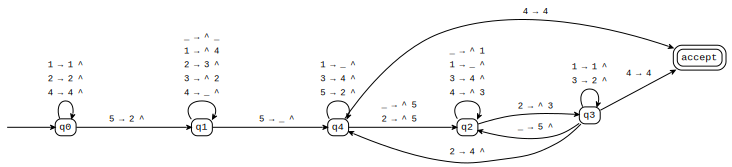

In [2]:
u = read_csv('utm.csv')
u

The reason it can be so small is that the way it "encodes" a TM is actually to convert it into a simpler (but still Turing-equivalent) formalism called a _2-tag system_. Here's an example TM, Sipser's $M_2$:

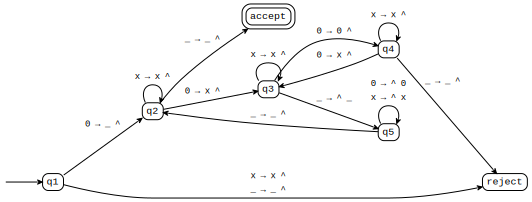

In [3]:
m2 = read_csv('tm-m2.csv')
m2

This machine converts to a 2-tag system with 450 rules. The rules look like CFG rules, but they work differently. (Match the first symbol with a rule's left-hand side, remove the first *two* symbols, and append the right-hand side.)

In [4]:
%cat tm-m2.tag

('A',_0,_1) -> ('C',_0,_1) x ('c',_0,_1) x
('α',_0,_1) -> ('c',_0,_1) x ('c',_0,_1) x
('B',_0,_1) -> ('S',_0,_1)
('β',_0,_1) -> ('s',_0,_1)
('C',_0,_1) -> ('D',_(0,_'read1'),_1) ('D',_(0,_'read1'),_0)
('c',_0,_1) -> ('d',_(0,_'read1'),_1) ('d',_(0,_'read1'),_0)
('S',_0,_1) -> ('T',_(0,_'read1'),_1) ('T',_(0,_'read1'),_0)
('s',_0,_1) -> ('t',_(0,_'read1'),_1) ('t',_(0,_'read1'),_0)
('D',_0,_1) -> ('A',_0,_1) x
('d',_0,_1) -> ('α',_0,_1) x
('T',_0,_1) -> ('B',_0,_1) x
('t',_0,_1) -> ('β',_0,_1) x
('D',_(0,_'read1'),_0) -> x ('A',_(0,_'read1'),_0) x
('d',_(0,_'read1'),_0) -> ('α',_(0,_'read1'),_0) x
('T',_(0,_'read1'),_0) -> ('B',_(0,_'read1'),_0) x
('t',_(0,_'read1'),_0) -> ('β',_(0,_'read1'),_0) x
('A',_(0,_'write0',_'move+2'),_1) -> ('C',_(0,_'write0',_'move+2'),_1) x
('α',_(0,_'write0',_'move+2'),_1) -> ('c',_(0,_'write0',_'move+2'),_1) x ('c',_(0,_'write0',_'move+2'),_1) x
('B',_(0,_'write0',_'move+2'),_1) -> ('S',_(0,_'write0',_'move+2'),_1)
('β',_(0,_'write0',_'move+2'),_1) -> ('s'

This 2-tag system, together with the input string $\texttt{0}$, are encoded into a string with 6.5 million symbols. Running the UTM is very slow. I had to write a special simulator that enables it to "fast-forward" in certain cases, and found that it accepts after **46 trillion moves**.

### The real numbers are uncountable

Now we shift for the moment to a totally different topic, the uncountability of the real numbers. The concept of an uncountable infinity, and the associated proof technique of diagonalization, was discovered by Georg Cantor. Unfortunately, it also drove him crazy.

**Read** subsection "The Diagonalization Method," from page 202 to the table at the top of page 206.

Suppose that there are countably many real numbers. Then there is a way to enumerate all the real numbers in $[0,1)$. We can write the digits after the decimal point in a table like this:

|     | | | | |        |
|-----|-|-|-|-|--------|
|$x_1$|.1|4|1|5|$\cdots$|
|$x_2$|.5|5|5|5|$\cdots$|
|$x_3$|.1|2|3|4|$\cdots$|
|$x_4$|.5|0|0|0|$\cdots$|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|

Then we can form a new real number by taking the diagonal and changing every digit (but avoid 0 and 9, as explained in the book):

|     | | | | |        |
|-----|-|-|-|-|--------|
|$x_1$|.**1**|4|1|5|$\cdots$|
|$x_2$|.5|**5**|5|5|$\cdots$|
|$x_3$|.1|2|**3**|4|$\cdots$|
|$x_4$|.5|0|0|**0**|$\cdots$|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
|$x'$|.2|6|4|1|$\cdots$|


This new number cannot be equal to any row of the table, which is a contradiction.

### There are uncountably many languages

We can adapt Cantor's argument for the uncountability of the reals to an argument for the uncountability of the set of all languages. Our proof is different from the book's proof of Corollary 4.18 (page 206), and I think it should be okay just to read ours.

Suppose that there are countably many languages over a finite alphabet $\Sigma$. Then we can number them $L_1, L_2, L_3, \ldots$. 

We can number all strings in $\Sigma^\ast$ in [shortlex order](https://en.wikipedia.org/wiki/Shortlex_order). Call the $j$th string in this ordering $w^{(j)}$. (We use this notation to avoid confusion with the notation $w_j$ for the $j$th symbol of $w$.)

Imagine a big table whose $i$th row is $L_i$ and whose $j$th column is $w^{(j)}$, and cell $(i,j)$ says whether $w^{(j)} \in L_i$. For illustration's sake, we assume $\Sigma = \{\mathtt{0}, \mathtt{1}\}$. 

| | $\varepsilon$ | $\mathtt{0}$ |$\mathtt{1}$ | $\mathtt{00}$ | $\cdots$ |
|-----|-------|-------|-------|-------|--------|
|$L_1$| _no_  | _yes_ | _no_  | _yes_ | $\cdots$ |
|$L_2$| _no_  | _yes_ | _yes_ | _no_  | $\cdots$ |
|$L_3$| _yes_ | _no_  | _yes_ | _no_  | $\cdots$ |
|$L_4$| _no_  | _no_  | _no_  | _yes_ | $\cdots$ |
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$| |

Then we can form a new language by taking all the diagonal entries of this table and inverting them (yes to no and no to yes):

| | $\varepsilon$ | $\mathtt{0}$ |$\mathtt{1}$ | $\mathtt{00}$ | $\cdots$ |
|-----|-------|-------|-------|-------|--------|
|$L_1$| **no**  | _yes_ | _no_  | _yes_ | $\cdots$ |
|$L_2$| _no_  | **yes** | _yes_ | _no_  | $\cdots$ |
|$L_3$| _yes_ | _no_  | **yes** | _no_  | $\cdots$ |
|$L_4$| _no_  | _no_  | _no_  | **yes** | $\cdots$ |
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$| |
|$L'$| _yes_ | _no_ | _no_ | _no_ | $\cdots$ |

More formally,
$$L' = \{ w^{(i)} \mid w^{(i)} \not\in L_i \}.$$

This language $L'$ cannot be equal to any row of the table, because for any $i$, either $w^{(i)} \in L'$ but $w^{(i)} \not\in L_i$, or $w^{(i)} \not\in L'$ but $w^{(i)} \in L_i$.

But the table supposedly contains all possible languages, which is a contradiction. Therefore there are uncountably many languages.

## Thursday

Today's topic is undecidability: is there such a thing as a language that can't be decided by a Turing machine (and therefore, by any computer program as we know it)?

The answer is yes, and not only so, but *almost all* languages are undecidable.

### There is an undecidable language

Since Turing machines can be encoded as strings, there _is_ a way to number all possible Turing machines $M_1, M_2, M_3, \ldots$ (e.g., sort their encodings in shortlex order and then number them consecutively). It follows that there are languages (in fact, almost all languages) which cannot be decided by any Turing machine. But we'd like a proof that explicitly constructs such a language.

Imagine a big table whose $i$th row is $M_i$ and whose $j$th column is $w^{(j)}$, and cell $(i,j)$ says whether $w^{(j)} \in \mathcal{L}(M_i)$ (that is, it says "yes" if $M_i$ accepts $w^{(j)}$, but "no" if $M_i$ rejects _or_ loops on $w^{(j)}$.)

| | $\varepsilon$ | $\mathtt{0}$ |$\mathtt{1}$ | $\mathtt{00}$ | $\cdots$ |
|-----|-------|-------|-------|-------|--------|
|$M_1$| _no_  | _yes_ | _no_  | _yes_ | $\cdots$ |
|$M_2$| _no_  | _yes_ | _yes_ | _no_  | $\cdots$ |
|$M_3$| _yes_ | _no_  | _yes_ | _no_  | $\cdots$ |
|$M_4$| _no_  | _no_  | _no_  | _yes_ | $\cdots$ |
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$| |

We can again form a new language by taking all the diagonal entries of this table and inverting them:

$$L_D = \{w^{(i)} \mid \text{$M_i$ does not accept $w^{(i)}$}\}$$

And this language again cannot be equal to any row of the table, because for any $i$, either $w^{(i)} \in L_D$ but $M_i$ does not accept $w^{(i)}$, or $w^{(i)} \not\in L_D$ but $M_i$ accepts $w^{(i)}$.

This means that there is no such thing as a Turing machine that decides $L_D$. (In fact, there isn't even one that recognizes it.)

### The undecidable language $A_{\mathsf{TM}}$

The book's first example of an undecidable language is

$$A_{\mathsf{TM}} = \{ \langle M, w \rangle \mid \text{$M$ accepts $w$} \}.$$

This language will be very useful for proving other undecidable languages. We can prove $A_{\mathsf{TM}}$ undecidable by continuing our proof above. Suppose that there exists a decider $H$ that decides $A_{\mathsf{TM}}$. 

Then we would be able to compute the value of any cell of the above table since $H$ is supposedly a decider. But that would enable us to define a decider for $L_D$. Namely, define a TM $D$ that, on input $w$, 

1. Find $i$ such that $w = w^{(i)}$.
2. Construct machine $M_i$.
3. Run $H$ on input $\langle M_i, w^{(i)} \rangle$.
4. If $H$ accepts, *reject*, and if $H$ rejects, *accept*.

But we know this is impossible, either by using the undecidability of $L_D$ as shown above, or we can repeat the argument again. If $D$ exists, then for some $i$, $D = M_i$. If $D$ accepts $w^{(i)}$, then (by the definition of $D$) we know that $H$ rejects $\langle D, w^{(i)}\rangle$, but (by the definition of $H$) it was supposed to accept. Similarly, if $D$ rejects $w^{(i)}$, then (by the definition of $D$) we know that $H$ accepts $\langle D, w^{(i)}\rangle$, but (by the definition of $H$) it was supposed to reject. Therefore, $D$ cannot exist, and $A_{\mathsf{TM}}$ is undecidable.

**Read:** If the above isn't clear, try the book's proof on pages 207–209.

### The halting problem

Most books use the following language as their first undecidable language:

$$\mathit{HALT}_{\mathsf{TM}} = \{ \langle M, w \rangle \mid \text{$M$ halts on $w$} \}.$$

This is probably the most well-known undecidable problem: Can you write a program that looks at another program $M$ and input $w$ and decides whether $M$ halts or loops on $w$?

**Question:** Adapt the above diagonalization argument to prove that $\mathit{HALT}_{\mathsf{TM}}$ is undecidable.

**Read (optional)**: Geoff Pullum's "[Scooping the Loop Snooper](http://www.lel.ed.ac.uk/~gpullum/loopsnoop.html): A proof that the Halting Problem is undecidable."

**Read** the subsection "A Turing-Unrecognizable Language."

### A first look at reducibility

Now that we've proven that one language ($A_{\mathsf{TM}}$) is undecidable, we can use it to prove that other languages are undecidable.

**Read** pages 215–217, up to "via the diagonalization method."

The first example is the halting problem $\mathit{HALT}_{\mathsf{TM}}$. In many textbooks (and the poem "Scooping the Loop Snooper"), the halting problem is actually the prototypical undecidable language, but Sipser does things a little differently.

To prove that the halting problem is undecidable, you assume that it *is* decidable, that is, there is a TM $R$ that decides it. Then, you show that armed with such a TM, you could implement another TM, $S$, that decides $A_{\mathsf{TM}}$, which is a contradiction because we know that $A_{\mathsf{TM}}$ is undecidable.

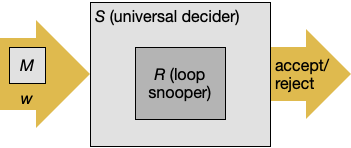

Remember that the direction of the reduction is the opposite of what most people intuitively think of first. If you want to show that the halting problem is undecidable, you do _not_ reduce the halting problem to $A_{\mathsf{TM}}$; you reduce $A_{\mathsf{TM}}$ to the halting problem. To avoid confusion (and, you will see that the potential for confusion grows below), we give a nickname to each TM to help you remember which is which. Call $R$ the "loop snooper," in homage to Pullum, and $S$ the "universal decider" (because it's a universal TM but it always halts).

So, suppose that we had a TM $R$ (the loop snooper) that decides the halting problem $\mathit{HALT}_{\mathsf{TM}}$. Then, designing a universal decider $S$ would be easy: $S =$ "On input $\langle M, w\rangle$,

1. Use the loop snooper $R$ to check whether $M$ loops on $w$.
2. If a loop is detected, *reject*.
3. If no loop is detected, we can safely simulate $M$ on $w$.
4. If it accepts, *accept*.
5. If it rejects, *reject*.

But last time we showed (by diagonalization) that the universal decider $S$ does not exist. Therefore, the loop snooper $R$ cannot exist either.